<a href="https://colab.research.google.com/github/TheTalesman/ml-notebooks/blob/main/TENSORFLOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print (tf.__version__)

2.4.1


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels) , (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

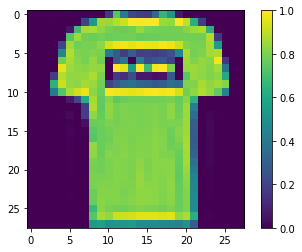

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

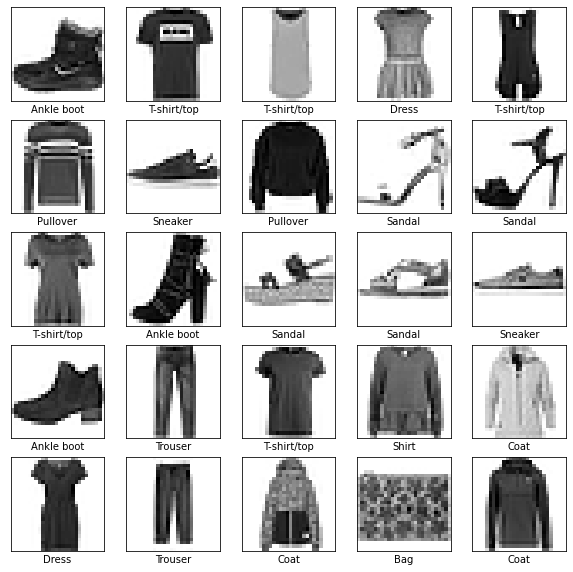

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model= keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation='relu'),
                         keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6246 - accuracy: 0.7819
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3726 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3301 - accuracy: 0.8800
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3149 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2854 - accuracy: 0.8950
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2772 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2640 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2521 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2401 - accuracy: 0.9104
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.232

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:',test_acc)

313/313 - 0s - loss: 0.3339 - accuracy: 0.8850

Test accuracy: 0.8849999904632568


In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([5.1091445e-07, 2.5768703e-08, 4.0948964e-07, 2.0679190e-10,
       2.2674588e-07, 1.8844102e-02, 1.3461894e-06, 5.5180001e-03,
       6.7890232e-07, 9.7563463e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False) 
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array,  color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


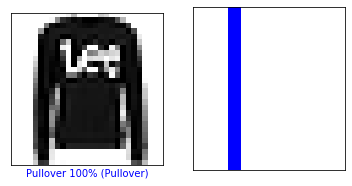

In [ ]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

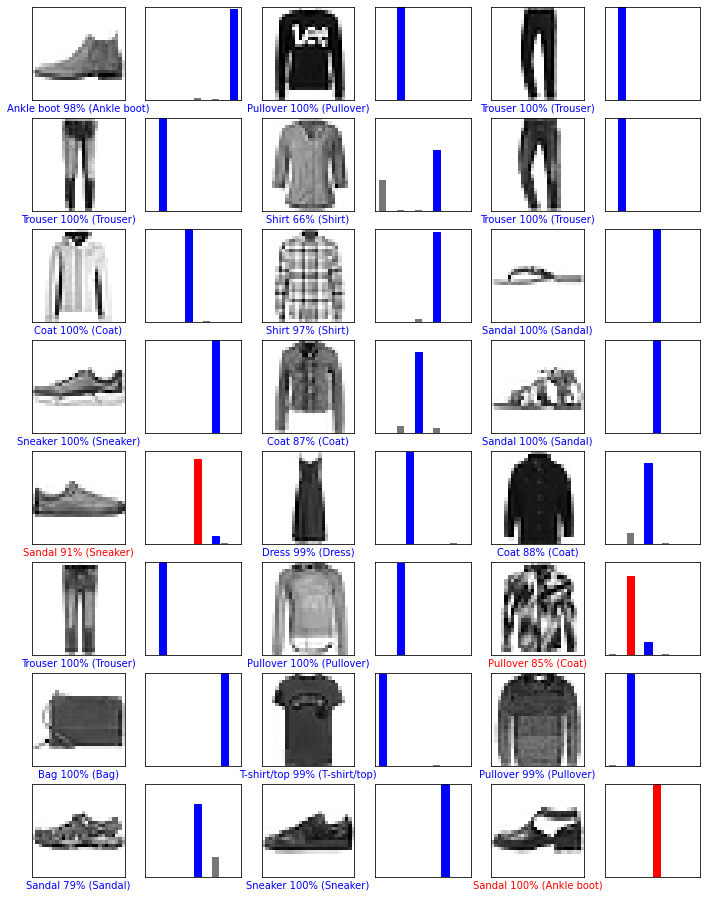

In [ ]:
num_rows = 8
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
img = test_images[0]
print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.2690120e-06 1.8361031e-06 4.3385808e-07 2.9429902e-08 1.0845062e-06
  1.2483101e-04 1.6525693e-08 4.2693976e-02 1.6894386e-06 9.5717478e-01]]


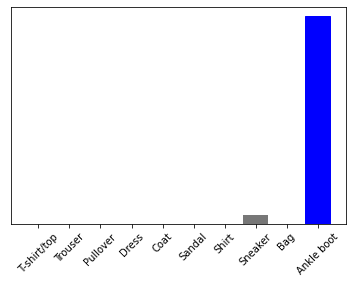

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

9